In [1]:
import numpy as np
import pandas as pd


In [12]:

with open(r"C:\Users\Hp\Downloads\Non drug trafficking.txt",'r') as file:
    non_drug=file.read()

In [5]:
import tensorflow as tf


In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [8]:
import nltk

In [9]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
from nltk.tokenize import sent_tokenize

In [14]:
non_drug=sent_tokenize(non_drug)

In [20]:
inst=" ".join(non_drug[0].split()[-3:])

In [22]:
inst

'"Love this vibe!"'

In [24]:
non_drug=non_drug[1:]

In [26]:
non_drug.append(inst)

In [27]:
non_drug

['"This is an amazing photo!"',
 '"What a wonderful day!"',
 '"So much fun with friends!"',
 '"Canâ€™t wait to go back!"',
 '"The sunset is stunning!"',
 '"Great food and good company."',
 '"Wish I was there with you."',
 '"This is pure happiness!"',
 '"So inspiring to see this!"',
 '"Love your energy in this post!"',
 '"This made my day brighter!"',
 '"What a beautiful moment captured!"',
 '"Canâ€™t believe how beautiful it is."',
 '"This place looks incredible!"',
 '"Amazing adventure with the crew!"',
 '"So proud of you!"',
 '"Letâ€™s plan a trip soon!"',
 '"Gorgeous scenery!"',
 '"Such a great memory!"',
 '"This is what life is about!"',
 '"You look amazing in this shot!"',
 '"Absolutely love this!"',
 '"What an unforgettable experience!"',
 '"Canâ€™t stop smiling looking at this!"',
 '"You always capture the best moments!"',
 '"This photo is everything!"',
 '"Youâ€™re living your best life!"',
 '"Such a cute picture!"',
 '"This is the kind of happiness I need."',
 '"So happy for y

In [28]:
import string

In [31]:
def preprocessing_text(text):
    table=str.maketrans('','',string.punctuation)
    pre_text=[]
    for inst in text:
        sent=""
        words=inst.split(" ")
        for word in words:
            word=word.translate(table)
            if word.isalpha():
                word=word.lower()
                sent+=word
                sent+=" "
                
        pre_text.append(sent.strip())
        
    return pre_text
        
        
    

In [32]:
non_drug_dataset=preprocessing_text(non_drug)

In [34]:
len(non_drug_dataset)

600

In [35]:
non_drug_label=len(non_drug_dataset)*[0]

In [37]:
len(non_drug_label)

600

In [38]:
dataset=pd.DataFrame({'comment':non_drug_dataset,'label':non_drug_label})

In [39]:
dataset

,comment,label
0,this is an amazing photo,0
1,what a wonderful day,0
2,so much fun with friends,0
3,wait to go back,0
4,the sunset is stunning,0
...,...,...
595,the secret to achieving culinary bliss,0
596,how do i find joy in everyday moments,0
597,your favorite way to savor experiences,0
598,how do i ensure my kitchen reflects my persona...,0


In [40]:
with open(r"C:\Users\Hp\Downloads\Drug trafficking.txt",'r') as file:
    drug_text=file.read()

In [41]:
drug_text=sent_tokenize(drug_text)

In [43]:
len(drug_text)

781

In [44]:
drug_text=preprocessing_text(drug_text)

In [45]:
drug_text

['just bought some green from my guy its fire',
 'anyone know where to find a good plug',
 'cant wait to score some tonight',
 'that dealer in the alley has the best stash',
 'hit me up if you need that stuff',
 'just chilling with my connect best vibes',
 'the white stuff is smooth this week',
 'my guy never disappoints always good quality',
 'heard theres a new supplier in town anyone tried',
 'just got my hands on some goodies feeling great',
 'looking for some quality stuff for the weekend',
 'the last batch was wild cant wait for more',
 'this connect is legit never had issues',
 'always on the hunt for new highs',
 'selling those highs dm if interested',
 'that spot has the best prices around',
 'just scored some fire feeling good',
 'need to find a new dealer mine ghosted me',
 'my friend told me about a new plug',
 'that last hit was unforgettable best ever',
 'anyone down to share some tips on finding quality',
 'always keep your stash hidden safety first',
 'who else is tryin

In [46]:
drug_label=len(drug_text)*[1]

In [48]:
len(drug_label)

781

In [49]:
dataset2=pd.DataFrame({'comment':drug_text,'label':drug_label})

In [50]:
dataset2

,comment,label
0,just bought some green from my guy its fire,1
1,anyone know where to find a good plug,1
2,cant wait to score some tonight,1
3,that dealer in the alley has the best stash,1
4,hit me up if you need that stuff,1
...,...,...
776,your take on drugtesting policies in the workp...,1
777,how can i maintain my drug use as a personal c...,1
778,the best way to manage a bad trip on psychedelics,1
779,how can i keep informed about drugrelated heal...,1


In [52]:
dataset_final=pd.concat([dataset,dataset2],axis=0)

In [53]:
dataset_final

,comment,label
0,this is an amazing photo,0
1,what a wonderful day,0
2,so much fun with friends,0
3,wait to go back,0
4,the sunset is stunning,0
...,...,...
776,your take on drugtesting policies in the workp...,1
777,how can i maintain my drug use as a personal c...,1
778,the best way to manage a bad trip on psychedelics,1
779,how can i keep informed about drugrelated heal...,1


In [55]:
dataset_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1381 entries, 0 to 780
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  1381 non-null   object
 1   label    1381 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 32.4+ KB


In [57]:
data=dataset_final.sample(frac=1).reset_index(drop=True)

In [58]:
data

,comment,label
0,meet up got some fresh stuff,1
1,my friend told me about a new plug,1
2,anyone know where to find the best prices,1
3,the best way to enjoy the company of loved ones,0
4,cant find a dealer i trust help,1
...,...,...
1376,your favorite way to unwind with a good book,0
1377,the secret to achieving a harmonious kitchen,0
1378,coke and heroin are a dangerous combo selling ...,1
1379,your strategy for exploring the world through ...,0


In [60]:
data['word_count']=data['comment'].apply(lambda x: len(x.split()))

In [62]:
data

,comment,label,word_count
0,meet up got some fresh stuff,1,6
1,my friend told me about a new plug,1,8
2,anyone know where to find the best prices,1,8
3,the best way to enjoy the company of loved ones,0,10
4,cant find a dealer i trust help,1,7
...,...,...,...
1376,your favorite way to unwind with a good book,0,9
1377,the secret to achieving a harmonious kitchen,0,7
1378,coke and heroin are a dangerous combo selling ...,1,10
1379,your strategy for exploring the world through ...,0,8


In [63]:
import matplotlib.pyplot as plt

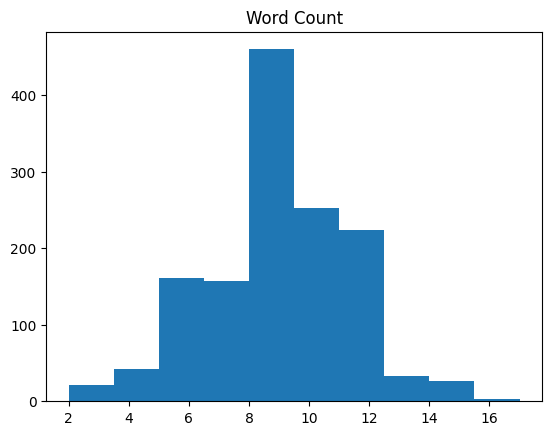

In [66]:
plt.hist(data['word_count'])
plt.title('Word Count')
plt.show()

Text(0.5, 1.0, 'Word count of Non drug traficking comments')

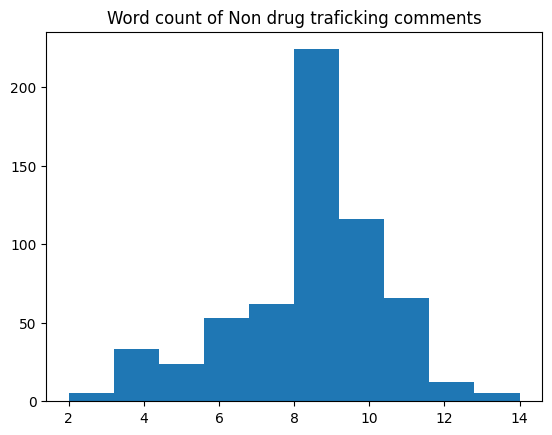

In [68]:
plt.hist(data[data['label']==0]['word_count'])
plt.title('Word count of Non drug traficking comments')

Text(0.5, 1.0, 'Word count of Drug traficking comments')

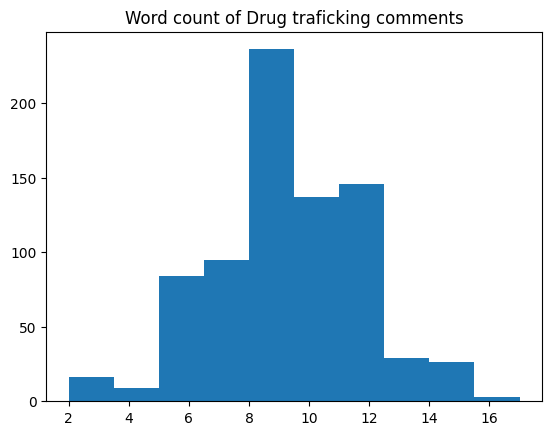

In [69]:
plt.hist(data[data['label']==1]['word_count'])
plt.title('Word count of Drug traficking comments')

In [73]:
data.to_csv(r"C:\Users\Hp\AppData\Local\Programs\Python\Python311\Scripts\Codeutsav\final_dataset.csv",index=False)

In [45]:
data=pd.read_csv(r"C:\Users\Hp\AppData\Local\Programs\Python\Python311\Scripts\Codeutsav\final_dataset.csv")

In [46]:
data

,comment,label,word_count
0,meet up got some fresh stuff,1,6
1,my friend told me about a new plug,1,8
2,anyone know where to find the best prices,1,8
3,the best way to enjoy the company of loved ones,0,10
4,cant find a dealer i trust help,1,7
...,...,...,...
1376,your favorite way to unwind with a good book,0,9
1377,the secret to achieving a harmonious kitchen,0,7
1378,coke and heroin are a dangerous combo selling ...,1,10
1379,your strategy for exploring the world through ...,0,8


In [47]:
print(f"Average word count: {data['word_count'].mean()}")
print(f"Maximum word count: {data['word_count'].max()}")
print(f"Minimum word count: {data['word_count'].min()}")

Average word count: 8.770456191165822
Maximum word count: 17
Minimum word count: 2


In [48]:
dataX=list(data['comment'])

In [49]:
dataY=list(data['label'])

In [50]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [51]:
tokenizer=Tokenizer(oov_token='OOV')

In [52]:
tokenizer.fit_on_texts(dataX)

In [53]:
data_seq=tokenizer.texts_to_sequences(dataX)

In [54]:
data_seq

[[194, 52, 53, 31, 116, 69],
 [5, 214, 553, 20, 12, 7, 19, 365],
 [46, 37, 244, 3, 25, 2, 14, 152],
 [2, 14, 11, 3, 63, 2, 554, 10, 555, 449],
 [129, 25, 7, 39, 4, 266, 43],
 [18, 8, 31, 36, 69, 8, 2, 195],
 [2, 556, 11, 3, 167, 8, 7, 557, 215],
 [27, 9, 21, 56, 12, 50, 797, 301, 83, 558, 3, 450],
 [23, 59, 110, 2, 14, 152, 366],
 [6, 9, 4, 48, 5, 89, 451],
 [28, 64, 24, 267, 302, 4, 559],
 [6, 9, 4, 84, 367, 15, 5, 368],
 [6, 9, 4, 47, 5, 60, 33, 303, 216, 40, 560],
 [6, 16, 4, 47, 5, 65, 33, 304, 40, 245],
 [5, 180, 369, 561, 61, 41, 36],
 [305, 12, 2, 798, 10, 5, 30, 4, 45, 7, 85, 103],
 [6, 9, 4, 97, 306, 5, 64, 452, 116],
 [27, 33, 2, 14, 799, 8, 7, 268, 800, 801],
 [32, 53, 31, 116, 562, 196],
 [32, 130, 31, 197, 90, 13],
 [6, 9, 4, 48, 5, 802, 123, 98, 86, 19],
 [71, 20, 52, 70, 21, 131, 2, 139, 64],
 [17, 75, 3, 246, 7, 216, 803],
 [2, 14, 11, 3, 370, 563, 13, 5, 804],
 [6, 9, 4, 47, 5, 65, 33, 371],
 [28, 64, 24, 267, 302, 4, 559],
 [32, 198, 453, 8, 5, 180, 3, 71, 20, 52],
 [

In [55]:
word_index=tokenizer.word_index

In [56]:
word_index

{'OOV': 1,
 'the': 2,
 'to': 3,
 'i': 4,
 'my': 5,
 'how': 6,
 'a': 7,
 'for': 8,
 'do': 9,
 'of': 10,
 'way': 11,
 'about': 12,
 'in': 13,
 'best': 14,
 'with': 15,
 'can': 16,
 'your': 17,
 'looking': 18,
 'new': 19,
 'me': 20,
 'you': 21,
 'want': 22,
 'that': 23,
 'is': 24,
 'find': 25,
 'on': 26,
 'what': 27,
 'this': 28,
 'more': 29,
 'drugs': 30,
 'some': 31,
 'just': 32,
 'are': 33,
 'who': 34,
 'drug': 35,
 'quality': 36,
 'know': 37,
 'weed': 38,
 'dealer': 39,
 'and': 40,
 'good': 41,
 'someone': 42,
 'help': 43,
 'heroin': 44,
 'need': 45,
 'anyone': 46,
 'ensure': 47,
 'keep': 48,
 'secret': 49,
 'using': 50,
 'favorite': 51,
 'up': 52,
 'got': 53,
 'been': 54,
 'life': 55,
 'think': 56,
 'last': 57,
 'use': 58,
 'spot': 59,
 'meals': 60,
 'always': 61,
 'different': 62,
 'enjoy': 63,
 'stash': 64,
 'experiences': 65,
 'was': 66,
 'explore': 67,
 'create': 68,
 'stuff': 69,
 'if': 70,
 'hit': 71,
 'learn': 72,
 'from': 73,
 'balance': 74,
 'approach': 75,
 'celebrate': 76,

In [57]:
tokenizer_json=tokenizer.to_json()

In [24]:
with open('drug_sentiment_tokenizer.json','w') as file:
    file.write(tokenizer_json)

In [58]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [59]:
data_seq=pad_sequences(data_seq,maxlen=12,padding='post',truncating='post')

In [60]:
data_seq

array([[194,  52,  53, ...,   0,   0,   0],
       [  5, 214, 553, ...,   0,   0,   0],
       [ 46,  37, 244, ...,   0,   0,   0],
       ...,
       [ 92,  40,  44, ..., 676,   0,   0],
       [ 17, 168,   8, ...,   0,   0,   0],
       [ 18,   8,   7, ...,   0,   0,   0]])

In [61]:
dataY=np.array(dataY)

In [62]:
from tensorflow.keras.layers import LSTM,Bidirectional,Dense,Input,Dropout

In [63]:
from tensorflow.keras.layers import Conv2D,Embedding

In [64]:
from tensorflow.keras.models import Model

In [65]:
from tensorflow.keras.layers import LayerNormalization

In [66]:
from tensorflow.keras.optimizers import Adam

In [67]:
def embedding_matrix_generation(path,embedding_dim,vocab_size,word_index):
    embed_index={}
    with open(path,'r',encoding='utf-8') as file:
        for line in file:
            vector=line.split()
            word=vector[0]
            embedding=np.asarray(vector[1:],dtype='float32')
            embed_index[word]=embedding
            
    embedding_matrix=np.zeros(shape=(vocab_size,embedding_dim),dtype='float32')
    for word in word_index.keys():
        if word in embed_index.keys():
            embedding_matrix[word_index[word]]=embed_index[word]
        else:
            embedding_matrix[word_index[word]]=np.random.normal(size=(1,embedding_dim),loc=0.0,scale=1.0)
            
    return embedding_matrix
        

In [68]:
from tensorflow.keras.initializers import Constant

In [69]:
from tensorflow.keras.layers import MaxPooling2D

In [70]:
from tensorflow.keras.layers import Reshape

In [71]:
from tensorflow.keras.layers import Flatten

In [72]:
from tensorflow.keras.constraints import Constraint

In [73]:
class FractionConstraint(Constraint):
    def __init__(self,**kwargs):
        super().__init__(**kwargs)
        
    def __call__(self,w):
        return tf.clip_by_value(w,0.0,1.0)

In [74]:
from tensorflow.keras.layers import Layer

In [75]:
from tensorflow.keras.layers import Add

In [76]:
class WeightedLayer(Layer):
    def __init__(self,**kwargs):
        super().__init__(**kwargs)
        
        self.lstm_weight=self.add_weight(
            name='lstm_model_weightage',
            initializer=tf.constant_initializer(0.7),
            trainable=True,
            constraint=FractionConstraint()
        )
        self.cnn_weight=1-self.lstm_weight
        
    def call(self,lstm,cnn):
        lstm_out=self.lstm_weight*lstm
        cnn_out=self.cnn_weight*cnn
        out=Add()([lstm_out,cnn_out])
        return out
        
        

In [77]:
def build_model(input_shape,vocab_size,embedding_dim,embedding_matrix):
    inp=Input(shape=input_shape,dtype=tf.int32)
    embed_layer=Embedding(input_dim=vocab_size,
                          output_dim=embedding_dim,
                          embeddings_initializer=Constant(embedding_matrix),
                          trainable=True,
                          mask_zero=True)(inp)
    bi_layer=Bidirectional(LSTM(units=16,return_sequences=True))(embed_layer)
    bi_layer=LayerNormalization()(bi_layer)
    
    #LSTM Layers:
    x=LSTM(units=32,activation='relu',kernel_initializer='he_normal',return_sequences=True)(bi_layer)
    x=LayerNormalization()(x)
    x=LSTM(units=64,activation='relu',kernel_initializer='he_normal',return_sequences=False)(x)
    x=LayerNormalization()(x)
    x=Dense(units=256,activation='relu',kernel_initializer='he_normal')(x)
    
    #CNN Layers:
    y=Reshape((bi_layer.shape[1],bi_layer.shape[2],1))(bi_layer)
    y=Conv2D(16,(3,3),activation='relu',padding='same',kernel_initializer='he_normal')(y)
    y=MaxPooling2D((2,2),padding='same')(y)
    y=LayerNormalization()(y)
    y=Conv2D(4,(3,3),activation='relu',padding='same',kernel_initializer='he_normal')(y)
    y=MaxPooling2D((2,2),padding='same')(y)
    y=LayerNormalization()(y)
    y=Flatten()(y)
    y=Dense(units=256,activation='relu',kernel_initializer='he_normal')(y)
    
    #Combining Model Output:
    z=WeightedLayer()(x,y)
    z=Dense(units=64,activation='relu',kernel_initializer='he_normal')(z)
    z=Dense(units=16,activation='relu',kernel_initializer='he_normal')(z)
    z=Dropout(0.2)(z)
    z=Dense(units=8,activation='relu',kernel_initializer='he_normal')(z)
    z=Dense(units=1,activation='sigmoid',kernel_initializer='glorot_normal')(z)
    
    #Final Model:
    model=Model(inputs=inp,outputs=z)
    return model
    
    
    

In [78]:
vocab_size

1342

In [79]:
vocab_size=len(word_index)+1
matrix=embedding_matrix_generation(path=r"C:\Users\Hp\AppData\Local\Programs\Python\Python311\Scripts\BeMyShakespeare\glove\glove.6B.50d.txt",
                                   embedding_dim=50,
                                   vocab_size=vocab_size,
                                   word_index=word_index)

In [32]:
import pickle

In [37]:
with open('embedding_matrix.txt','w') as file:
    file.write(matrix)

TypeError: write() argument must be str, not numpy.ndarray

In [35]:
with open('embedding_matrix.txt','r') as file:
    m=file.read()

In [39]:
np.savetxt('embed_matrix.txt',matrix)

In [40]:
m=np.loadtxt('embed_matrix.txt')

In [42]:
type(m)

numpy.ndarray

In [81]:
import tensorflow as tf

In [82]:
model=build_model(input_shape=(12,),
                  vocab_size=vocab_size,
                  embedding_dim=50,
                  embedding_matrix=matrix)

C:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\layer.py:857: UserWarning: Layer 'reshape' (of type Reshape) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


In [83]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 12)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding (Embedding)         │ (None, 12, 50)            │          67,100 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ not_equal (NotEqual)          │ (None, 12)                │               0 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bidirectional (Bidirectional) │ (None, 12, 32)            │           8,576 │ embedding[0][0],           │
│                               │                           │                 │ not_equal[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ layer_normalization           │ (None, 12, 32)            │              64 │ bidirectional[0][0]        │
│ (LayerNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ reshape (Reshape)             │ (None, 12, 32, 1)         │               0 │ layer_normalization[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 12, 32, 16)        │             160 │ reshape[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 6, 16, 16)         │               0 │ conv2d[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ layer_normalization_3         │ (None, 6, 16, 16)         │              32 │ max_pooling2d[0][0]        │
│ (LayerNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ lstm_1 (LSTM)                 │ (None, 12, 32)            │           8,320 │ layer_normalization[0][0], │
│                               │                           │                 │ not_equal[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 6, 16, 4)          │             580 │ layer_normalization_3[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ layer_normalization_1         │ (None, 12, 32)            │              64 │ lstm_1[0][0]               │
│ (LayerNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_1               │ (None, 3, 8, 4)           │               0 │ conv2d_1[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ lstm_2 (LSTM)                 │ (None, 64)                │          24,832 │ layer_normalization_1[0][… │
│                               │                           │               

 Total params: 168,970 (660.04 KB)

 Trainable params: 168,970 (660.04 KB)

 Non-trainable params: 0 (0.00 B)

In [84]:
optimizer=Adam(learning_rate=0.01,beta_1=0.96,beta_2=0.98)

In [ ]:
model.compile(optimizer=optimizer,
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [ ]:
data_seq

In [186]:
dataY

array([1, 1, 1, ..., 1, 0, 1])

In [187]:
history=model.fit(data_seq,dataY,epochs=15,batch_size=50)

Epoch 1/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.5117 - loss: 0.7014
Epoch 2/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.5854 - loss: 0.6562
Epoch 3/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7411 - loss: 0.4085
Epoch 4/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8256 - loss: 0.4405
Epoch 5/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9458 - loss: 0.2943
Epoch 6/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9763 - loss: 0.1995
Epoch 7/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9825 - loss: 0.1496
Epoch 8/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9883 - loss: 0.1302
Epoch 9/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9886 - loss: 0.0654
Epoch 10/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9876 - loss: 0.0471
Epoch 11/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9961 - loss: 0.0207
Epoch 12/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy

In [204]:
model.get_weights()

[array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.3354249 , -0.69448847,  0.21694964, ..., -0.38116658,
         -0.46756294,  0.16652548],
        [ 0.21852915,  0.0621331 , -0.2747821 , ..., -0.456997  ,
         -0.09080499, -0.41540486],
        ...,
        [ 1.1666365 ,  0.15642145,  0.37251547, ...,  0.09787644,
          1.2351819 ,  0.23466857],
        [-0.16491257,  1.2162985 , -0.6866186 , ..., -0.05245604,
         -0.1913044 , -0.2910093 ],
        [-0.27316937, -0.25264582,  0.10427378, ..., -0.371982  ,
         -0.35825083,  0.840934  ]], dtype=float32),
 array([[-0.01689694,  0.04237897,  0.3403315 , ...,  0.15521611,
         -0.0682677 ,  0.11483346],
        [-0.1756396 ,  0.35927904, -0.46134394, ...,  0.15953104,
         -0.2400697 ,  0.44977397],
        [ 0.2450723 ,  0.17912696,  0.21302927, ..., -0.47085783,
          0.2944239 , -0.7011886 ],
        ...,
        [ 0.03899788,  0.48431125,  0.2

In [206]:
model.save_weights('nlp_model_weights.weights.h5')

In [209]:
model2=build_model(input_shape=(12,),
                  vocab_size=vocab_size,
                  embedding_dim=50,
                  embedding_matrix=matrix)

C:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\layer.py:857: UserWarning: Layer 'reshape_6' (of type Reshape) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


In [210]:
model2.get_weights()

[array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.3354249 , -0.69448847,  0.21694964, ..., -0.38116658,
         -0.46756294,  0.16652548],
        [ 0.418     ,  0.24968   , -0.41242   , ..., -0.18411   ,
         -0.11514   , -0.78581   ],
        ...,
        [ 1.0913    , -0.067858  ,  0.30484   , ...,  0.26884   ,
          1.0775    ,  0.13825   ],
        [-0.0076543 ,  0.93456   , -0.73189   , ..., -0.089847  ,
         -0.27223   , -0.0088736 ],
        [-0.33668   , -0.21098   , -0.04349   , ..., -0.35296   ,
         -0.25288   ,  0.86439   ]], dtype=float32),
 array([[ 0.17701395, -0.05811964,  0.22631468, ..., -0.00052164,
          0.1827975 ,  0.08380468],
        [-0.14271912,  0.05943729, -0.12278622, ...,  0.18561308,
         -0.002538  ,  0.17785917],
        [-0.09268637,  0.22846432, -0.12957719, ..., -0.01321742,
         -0.21823086,  0.04732411],
        ...,
        [ 0.02278025, -0.15605757,  0.0

In [211]:
model2.load_weights(r"C:\Users\Hp\AppData\Local\Programs\Python\Python311\Scripts\Codeutsav\nlp_model_weights.weights.h5")

In [212]:
model2.get_weights()

[array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.3354249 , -0.69448847,  0.21694964, ..., -0.38116658,
         -0.46756294,  0.16652548],
        [ 0.21852915,  0.0621331 , -0.2747821 , ..., -0.456997  ,
         -0.09080499, -0.41540486],
        ...,
        [ 1.1666365 ,  0.15642145,  0.37251547, ...,  0.09787644,
          1.2351819 ,  0.23466857],
        [-0.16491257,  1.2162985 , -0.6866186 , ..., -0.05245604,
         -0.1913044 , -0.2910093 ],
        [-0.27316937, -0.25264582,  0.10427378, ..., -0.371982  ,
         -0.35825083,  0.840934  ]], dtype=float32),
 array([[-0.01689694,  0.04237897,  0.3403315 , ...,  0.15521611,
         -0.0682677 ,  0.11483346],
        [-0.1756396 ,  0.35927904, -0.46134394, ...,  0.15953104,
         -0.2400697 ,  0.44977397],
        [ 0.2450723 ,  0.17912696,  0.21302927, ..., -0.47085783,
          0.2944239 , -0.7011886 ],
        ...,
        [ 0.03899788,  0.48431125,  0.2

In [ ]:
model.save('codeutsav_model.h5')

In [198]:
from tensorflow.keras.models import load_model

In [199]:
from tensorflow.keras.utils import CustomObjectScope

In [ ]:
with CustomObjectScope({'WeightedLayer':WeightedLayer,'FractionConstraint':FractionConstraint}):
    m=load_model(r"C:\Users\Hp\AppData\Local\Programs\Python\Python311\Scripts\Codeutsav\model.keras")